## Connect with the GoogleDrive

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import all the modules

In [69]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import json
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, model_from_json
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from sklearn.utils import shuffle

# Load training HW data and assign labels for each data sample (`[1]`)

In [70]:
folder_path = '/content/drive/MyDrive/Experiment1/Training_MS_PCEN/DC'
png_files = glob.glob(os.path.join(folder_path, '*.png'))

images_as_arrays = []
count = 1
for file in png_files:
    with Image.open(file) as img:
        img_resized = img.resize((224, 224))
        img_array = np.array(img_resized)
        print(f"The data sample {file} is processed: {count}/{len(os.listdir('/content/drive/MyDrive/Experiment1/Training_MS_PCEN/DC'))}")
        count = count+1
        images_as_arrays.append(img_array)

training_images_HW = np.asarray(images_as_arrays)
training_labels_HW = np.ones(training_images_HW.shape[0])

The data sample /content/drive/MyDrive/Experiment1/Training_MS_PCEN/DC/53010BCD_0.png is processed: 1/240
The data sample /content/drive/MyDrive/Experiment1/Training_MS_PCEN/DC/53010BCD_0_shifted_8.png is processed: 2/240
The data sample /content/drive/MyDrive/Experiment1/Training_MS_PCEN/DC/53010BCD_0_shifted_4.png is processed: 3/240
The data sample /content/drive/MyDrive/Experiment1/Training_MS_PCEN/DC/53010BCD_0_shifted_1.0.png is processed: 4/240
The data sample /content/drive/MyDrive/Experiment1/Training_MS_PCEN/DC/53010BCD_130.png is processed: 5/240
The data sample /content/drive/MyDrive/Experiment1/Training_MS_PCEN/DC/53010BCD_130_shifted_8.png is processed: 6/240
The data sample /content/drive/MyDrive/Experiment1/Training_MS_PCEN/DC/53010BCD_130_shifted_4.png is processed: 7/240
The data sample /content/drive/MyDrive/Experiment1/Training_MS_PCEN/DC/53010BCD_130_shifted_1.0.png is processed: 8/240
The data sample /content/drive/MyDrive/Experiment1/Training_MS_PCEN/DC/530ACBE5_

In [71]:
import gc
gc.collect()
del img_resized, img_array, images_as_arrays
gc.collect()

0

# Load training NoHW data and assign labels for each data sample (`[0]`)

In [72]:
folder_path = '/content/drive/MyDrive/Experiment1/Training_MS_PCEN/NoDC'
png_files = glob.glob(os.path.join(folder_path, '*.png'))

images_as_arrays = []
count = 1
for file in png_files:
    with Image.open(file) as img:
        img_resized = img.resize((224, 224))
        img_array = np.array(img_resized)
        print(f"The data sample {file} is processed: {count}/{len(os.listdir('/content/drive/MyDrive/Experiment1/Training_MS_PCEN/NoDC'))}")
        count = count+1
        images_as_arrays.append(img_array)

training_images_NoHW = np.asarray(images_as_arrays)
training_labels_NoHW = np.zeros(training_images_NoHW.shape[0])

The data sample /content/drive/MyDrive/Experiment1/Training_MS_PCEN/NoDC/5316B776_0.png is processed: 1/240
The data sample /content/drive/MyDrive/Experiment1/Training_MS_PCEN/NoDC/5316B776_0_shifted_8.png is processed: 2/240
The data sample /content/drive/MyDrive/Experiment1/Training_MS_PCEN/NoDC/5316B776_0_shifted_4.png is processed: 3/240
The data sample /content/drive/MyDrive/Experiment1/Training_MS_PCEN/NoDC/5316B776_0_shifted_1.0.png is processed: 4/240
The data sample /content/drive/MyDrive/Experiment1/Training_MS_PCEN/NoDC/530D2511_60.png is processed: 5/240
The data sample /content/drive/MyDrive/Experiment1/Training_MS_PCEN/NoDC/530D2511_60_shifted_8.png is processed: 6/240
The data sample /content/drive/MyDrive/Experiment1/Training_MS_PCEN/NoDC/530D2511_60_shifted_4.png is processed: 7/240
The data sample /content/drive/MyDrive/Experiment1/Training_MS_PCEN/NoDC/530D2511_60_shifted_1.0.png is processed: 8/240
The data sample /content/drive/MyDrive/Experiment1/Training_MS_PCEN/

In [73]:
import gc
gc.collect()
del img_resized, img_array, images_as_arrays
gc.collect()

0

In [74]:
training_data = np.concatenate((training_images_HW, training_images_NoHW), axis=0)
training_labels = np.concatenate((training_labels_HW, training_labels_NoHW), axis=0)

In [75]:
training_data, training_labels = shuffle(training_data, training_labels, random_state=42)

In [76]:
import gc
gc.collect()
del training_images_HW, training_images_NoHW, training_labels_HW, training_labels_NoHW
gc.collect()

0

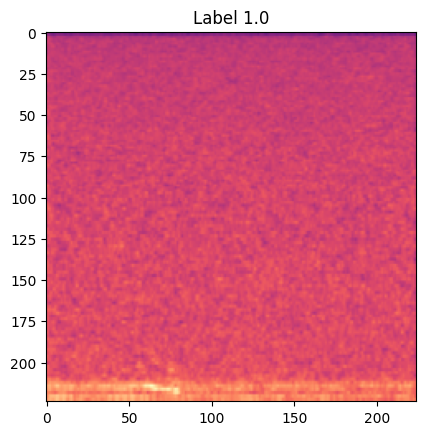

In [77]:
plt.figure()
plt.imshow(training_data[123])
plt.title(f'Label {training_labels[123]}')
plt.show()

# Load validation HW data and assign labels for each data sample (`[1]`)

In [78]:
folder_path = '/content/drive/MyDrive/Experiment1/Validation_MS_PCEN/DC'
png_files = glob.glob(os.path.join(folder_path, '*.png'))

images_as_arrays = []
count = 1
for file in png_files:
    with Image.open(file) as img:
        img_resized = img.resize((224, 224))
        img_array = np.array(img_resized)
        print(f"The data sample {file} is processed: {count}/{len(os.listdir('/content/drive/MyDrive/Experiment1/Validation_MS_PCEN/DC'))}")
        count = count+1
        images_as_arrays.append(img_array)

validation_images_HW = np.asarray(images_as_arrays)
validation_labels_HW = np.ones(validation_images_HW.shape[0])

The data sample /content/drive/MyDrive/Experiment1/Validation_MS_PCEN/DC/530120E6_180.png is processed: 1/21
The data sample /content/drive/MyDrive/Experiment1/Validation_MS_PCEN/DC/530120E6_0.png is processed: 2/21
The data sample /content/drive/MyDrive/Experiment1/Validation_MS_PCEN/DC/530120E6_280.png is processed: 3/21
The data sample /content/drive/MyDrive/Experiment1/Validation_MS_PCEN/DC/530120E6_100.png is processed: 4/21
The data sample /content/drive/MyDrive/Experiment1/Validation_MS_PCEN/DC/530120E6_140.png is processed: 5/21
The data sample /content/drive/MyDrive/Experiment1/Validation_MS_PCEN/DC/53472711_130.png is processed: 6/21
The data sample /content/drive/MyDrive/Experiment1/Validation_MS_PCEN/DC/53472711_10.png is processed: 7/21
The data sample /content/drive/MyDrive/Experiment1/Validation_MS_PCEN/DC/53472711_70.png is processed: 8/21
The data sample /content/drive/MyDrive/Experiment1/Validation_MS_PCEN/DC/5898501A_60.png is processed: 9/21
The data sample /content

In [79]:
import gc
gc.collect()
del img_resized, img_array, images_as_arrays
gc.collect()

0

# Load validation NoHW data and assign labels for each data sample (`[0]`)

In [80]:
folder_path = '/content/drive/MyDrive/Experiment1/Validation_MS_PCEN/NoDC'
png_files = glob.glob(os.path.join(folder_path, '*.png'))

images_as_arrays = []
count = 1
for file in png_files:
    with Image.open(file) as img:
        img_resized = img.resize((224, 224))
        img_array = np.array(img_resized)
        print(f"The data sample {file} is processed: {count}/{len(os.listdir('/content/drive/MyDrive/Experiment1/Validation_MS_PCEN/NoDC'))}")
        count = count+1
        images_as_arrays.append(img_array)

validation_images_NoHW = np.asarray(images_as_arrays)
validation_labels_NoHW = np.zeros(validation_images_NoHW.shape[0])

The data sample /content/drive/MyDrive/Experiment1/Validation_MS_PCEN/NoDC/53E9FF59_0.png is processed: 1/21
The data sample /content/drive/MyDrive/Experiment1/Validation_MS_PCEN/NoDC/53CFB672_50.png is processed: 2/21
The data sample /content/drive/MyDrive/Experiment1/Validation_MS_PCEN/NoDC/53B64781_70.png is processed: 3/21
The data sample /content/drive/MyDrive/Experiment1/Validation_MS_PCEN/NoDC/5438CF85_280.png is processed: 4/21
The data sample /content/drive/MyDrive/Experiment1/Validation_MS_PCEN/NoDC/53F48B59_280.png is processed: 5/21
The data sample /content/drive/MyDrive/Experiment1/Validation_MS_PCEN/NoDC/58D36EDD_90.png is processed: 6/21
The data sample /content/drive/MyDrive/Experiment1/Validation_MS_PCEN/NoDC/5932D5E9_80.png is processed: 7/21
The data sample /content/drive/MyDrive/Experiment1/Validation_MS_PCEN/NoDC/589F3BFA_140.png is processed: 8/21
The data sample /content/drive/MyDrive/Experiment1/Validation_MS_PCEN/NoDC/5998BF5D_40.png is processed: 9/21
The data

In [81]:
import gc
gc.collect()
del img_resized, img_array, images_as_arrays
gc.collect()

0

In [82]:
validation_data = np.concatenate((validation_images_HW, validation_images_NoHW), axis=0)
validation_labels = np.concatenate((validation_labels_HW, validation_labels_NoHW), axis=0)

In [83]:
validation_data, validation_labels = shuffle(validation_data, validation_labels, random_state=42)

In [84]:
import gc
gc.collect()
del validation_images_HW, validation_labels_HW, validation_images_NoHW, validation_labels_NoHW
gc.collect()

0

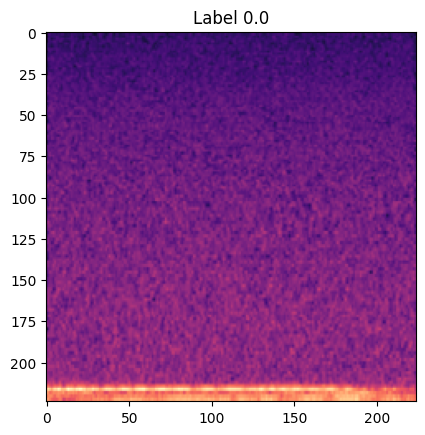

In [85]:
plt.figure()
plt.imshow(validation_data[3])
plt.title(f'Label {validation_labels[3]}')
plt.show()

## CNN Model

In [86]:
# Define hyperparameters for the NN architecture and training
num_classes = 1 # This is a binary classification task, so it is 1
image_size = 224

# Build CNN model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
for layer in base_model.layers:
    layer.trainable = True
x = base_model.output
x = GlobalAveragePooling2D()(x)
# FC layers
x = Dense(512, activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', name='FC1')(x)
x = Dropout(0.5)(x) # Dropout 0.5
x = Dense(256, activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', name='FC2')(x)
x = Dropout(0.2)(x)
output = Dense(num_classes, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=output)

## Compile the Model

In [87]:
sgd = SGD(learning_rate=2e-4)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

## Train the Model

In [88]:
batch_size = 8
epochs = 100
history = model.fit(training_data, training_labels, batch_size=batch_size, epochs=epochs, validation_data=(validation_data, validation_labels), shuffle=True, verbose=2)

Epoch 1/100
60/60 - 38s - 630ms/step - accuracy: 0.4604 - loss: 0.8006 - val_accuracy: 0.4762 - val_loss: 0.7330
Epoch 2/100
60/60 - 19s - 322ms/step - accuracy: 0.5250 - loss: 0.7349 - val_accuracy: 0.5000 - val_loss: 0.7031
Epoch 3/100
60/60 - 5s - 85ms/step - accuracy: 0.4792 - loss: 0.7631 - val_accuracy: 0.5476 - val_loss: 0.6978
Epoch 4/100
60/60 - 5s - 85ms/step - accuracy: 0.5104 - loss: 0.7306 - val_accuracy: 0.6190 - val_loss: 0.6896
Epoch 5/100
60/60 - 5s - 84ms/step - accuracy: 0.5083 - loss: 0.7569 - val_accuracy: 0.6190 - val_loss: 0.6686
Epoch 6/100
60/60 - 5s - 85ms/step - accuracy: 0.5104 - loss: 0.7274 - val_accuracy: 0.6667 - val_loss: 0.6686
Epoch 7/100
60/60 - 5s - 84ms/step - accuracy: 0.5021 - loss: 0.7308 - val_accuracy: 0.6429 - val_loss: 0.6374
Epoch 8/100
60/60 - 5s - 87ms/step - accuracy: 0.5271 - loss: 0.7231 - val_accuracy: 0.6905 - val_loss: 0.6244
Epoch 9/100
60/60 - 5s - 85ms/step - accuracy: 0.5312 - loss: 0.7084 - val_accuracy: 0.6905 - val_loss: 0.63

In [89]:
# Save model after training finished (see for more details,
# see: https://github.com/aaolcay/save_load_NN_model)
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/Experiment1/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Experiment1/model.weights.h5")
print("Saved model to disk")

Saved model to disk
